In [2]:
#pip install graphviz

# 결정 트리 (Decision Tree)

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
iris = load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data , iris.target , test_size=0.2, random_state=11
)

In [6]:
model = DecisionTreeClassifier(random_state=156)
model.fit(X_train, y_train) #DecisionTree로 iris데이터를 학습한 것

DecisionTreeClassifier(random_state=156)

### 모델 시각화

In [7]:
from sklearn.tree import export_graphviz
export_graphviz(
    model, out_file='tree.dot',
    class_names = iris.target_names,
    feature_names = iris.feature_names,
    impurity=True, filled=True
)

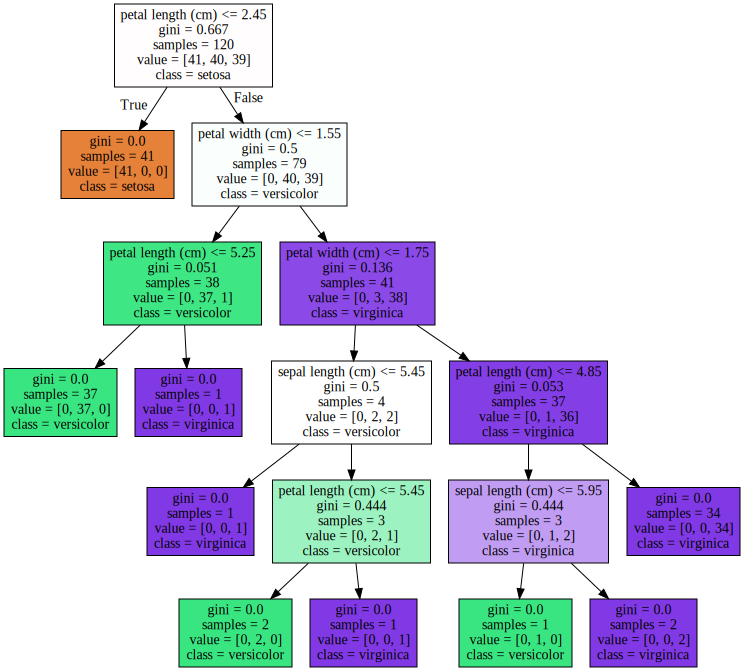

In [8]:
import graphviz

with open('tree.dot', 'r') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#정보균일도가 높을수록 색이 진해지는 것

### 제약 조건
- max_depth = 3 인 경우

In [9]:
model2 = DecisionTreeClassifier(max_depth=3, random_state=156)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [10]:
export_graphviz(
    model2, out_file='tree.dot',
    class_names = iris.target_names,
    feature_names = iris.feature_names,
    impurity=True, filled=True
)

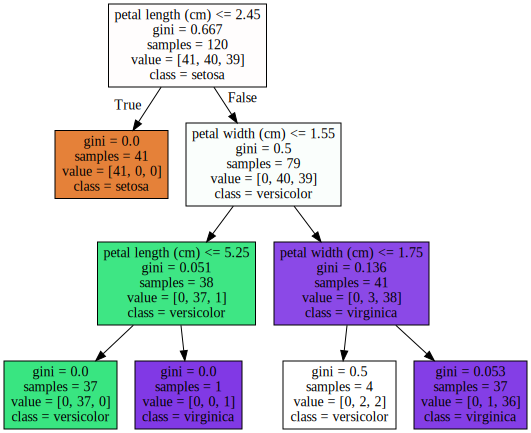

In [11]:
import graphviz

with open('tree.dot', 'r') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#제약조건을 주면 그래프를 사정없이 늘리는 것이 아니라 적당한 선에서 멈춘다.
#근데 그 적당한 선은 아무도 모름..
#

In [12]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
accuracy_score(y_test, pred)

# 93%

0.9333333333333333

In [13]:
pred2 = model2.predict(X_test)
accuracy_score(y_test, pred2)

# 93%

0.9333333333333333

- min_samples_split = 4 인 경우

In [24]:
model3 = DecisionTreeClassifier(max_depth=4, random_state=156)
model3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=156)

In [25]:
export_graphviz(
    model3, out_file='tree.dot',
    class_names = iris.target_names,
    feature_names = iris.feature_names,
    impurity=True, filled=True
)

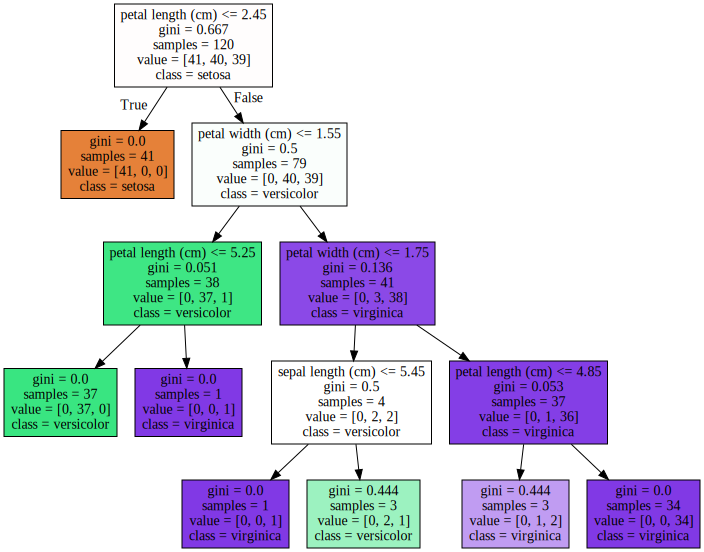

In [26]:
import graphviz

with open('tree.dot', 'r') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [27]:
pred3 = model3.predict(X_test)
accuracy_score(y_test, pred3)

0.9333333333333333

### Feature Importance

In [35]:
import seaborn as sns 

In [36]:
model.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

<AxesSubplot:>

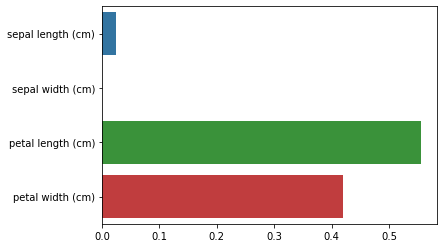

In [37]:
sns.barplot(x=model.feature_importances_ , y=iris.feature_names)